# Zadanie na 4

In [13]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#### Wczytywanie danych

In [14]:
headings = ['index',
            'date',
            'height']

data = pd.read_csv('../dane/manaus.csv', names=headings, skiprows=1)
data = data[['date', 'height']]
data['height'] = data['height'].astype(float)

#### Średnia wysokość 

In [15]:
avg = data['height'].mean()
print("Średnia względna wysokość poziomu wody w rzece Manaus:\n {}\n".format(avg))

Średnia względna wysokość poziomu wody w rzece Manaus:
 1.0185185185260135e-06



#### Sprawdzenie, czy dane są zgodne z rozkładem normalnym

In [16]:
k2, p = stats.normaltest(data["height"])
alpha = 0.05
print("Wartość p wynosi: {}".format(p), end='')
if p > alpha:
    print(" więc p > 5%,a zatem dane posiadają rozkład normalny.")
else:
    print(" więc p < 5%,a zatem dane nie posiadają rozkładu normalnego.")

Wartość p wynosi: 1.5503054748471935e-17 więc p < 5%,a zatem dane nie posiadają rozkładu normalnego.


#### Rysowanie histogramów

##### Obliczenie liczby przedziałów

In [17]:
bins = int((data['height'].max() - data['height'].min()) * 10.0)

##### Rysowanie histogramu poziomu wody w rzece Manaus

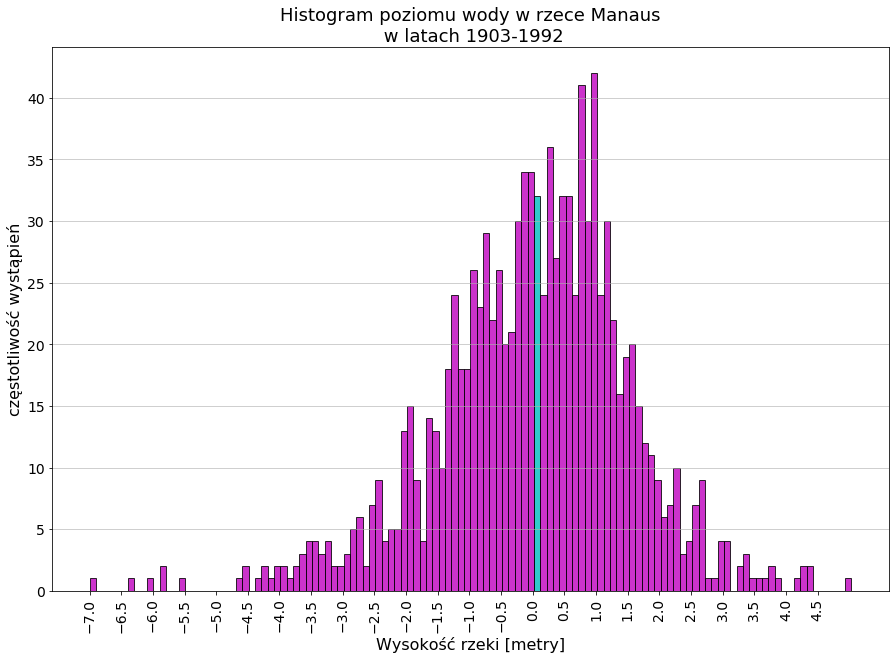

In [18]:
plt.figure(figsize=(15, 10))
plt.xticks(np.arange(data['height'].min().round(1), data['height'].max().round(1), 0.5))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel("Wysokość rzeki [metry]", FontSize='16')
plt.ylabel("częstotliwość wystąpień", FontSize='16')
N, bins, patches = plt.hist(data['height'].values, bins=bins, alpha=0.8, color="m", edgecolor="k")

# Znalezienie punktu dotyczacego hipotezy
index = (np.abs(bins-0.0)).argmin()
patches[index].set_fc('c')

# Wyświetlenie histogramu
plt.grid(axis='y', alpha=0.75)
plt.title("Histogram poziomu wody w rzece Manaus\n w latach 1903-1992", FontSize='18')
plt.show()